In [34]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import pandas as pd

In [36]:
transform = transforms.Compose([
    transforms.Resize((64, 64)), 
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

In [38]:
data_dir = '/Users/amansharma/Documents/Acads/STA 380 Intro to ML/David Part 2/Questions/EuroSAT_RGB'
#Loading data from a local directory. Replace it with your directory
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

In [40]:
# Get the total number of samples
num_samples = len(dataset)

# Calculate the size of the training set (80%)
train_size = int(0.8 * num_samples)

# Calculate the size of the test set (20%)
test_size = num_samples - train_size

# Create the train and test splits
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [42]:
!pip install opencv-python

In [43]:
import cv2
import PIL.Image as Image

# Load an image
img_path = '/Users/amansharma/Documents/Acads/STA 380 Intro to ML/David Part 2/Questions/EuroSAT_RGB/AnnualCrop/AnnualCrop_4.jpg' 

# Using OpenCV
img_cv = cv2.imread(img_path)
height, width, channels = img_cv.shape
print("OpenCV: Height =", height, "Width =", width, "Channels =", channels)


OpenCV: Height = 64 Width = 64 Channels = 3


#### Each image is 64 by 64 px, in RGB

In [45]:
# Hyperparameters for data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 64, 64])
torch.Size([32])
tensor([1, 4, 3, 7, 3, 7, 9, 0, 3, 4, 4, 4, 2, 3, 1, 7, 2, 2, 9, 2, 1, 0, 4, 0,
        0, 7, 4, 0, 0, 9, 0, 5])


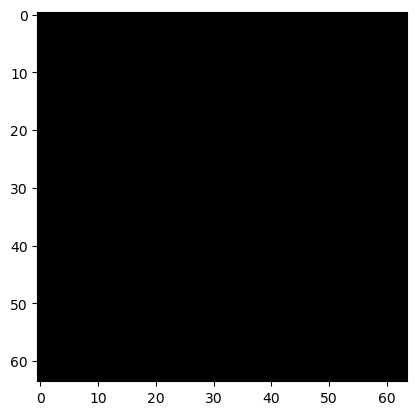

In [46]:
# Get the first batch from the train loader
images, labels = next(iter(train_loader))

# Print the shape of the images and labels
print(images.shape)  # Output: torch.Size([batch_size, channels, height, width])
print(labels.shape)  # Output: torch.Size([batch_size])
print(labels)

# Visualize a few images
import matplotlib.pyplot as plt

# Assuming 3 channels (RGB)
plt.imshow(images[0].permute(1, 2, 0))  # Permute to correct shape for plotting
plt.show()

#### Output Size Calculation: <br>
Output size = (Input size − Kernel size + (2 × Padding)) / Stride ) + 1


In [70]:
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=0)  # Output: 16x62x62
        self.relu1 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)  # Output: 32x60x60
        self.relu2 = nn.ReLU()
        
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)  # Output: 64x58x58
        self.relu3 = nn.ReLU()
        
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Output: 64x28x29
        
        self.flatten = nn.Flatten()
        
        # Adjust input size based on the pooled dimensions
        self.fc1 = nn.Linear(64*29*29, 120)  # Input: 64x28x28 -> 50176 features
        self.relu4 = nn.ReLU()
        
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.conv3(out)
        out = self.relu3(out)
        out = self.pool3(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.relu4(out)
        out = self.fc2(out)
        return out

net = CNNModel()
print(net)

CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=53824, out_features=120, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


### Design calls taken
-  Using three layers, to allow CNN to capture deeper patters
-  Using a max pooling layer to reduce noise before flattening
-  Outputting into a 10 length tensor, which should contain probabilities of each possible outcome

In [51]:
import torch.optim as optim
import tqdm

# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())



In [54]:
import os

def get_folder_names(data_dir):

  folder_names = []
  for root, dirs, files in os.walk(data_dir):
    folder_names.extend(dirs)
    break  # Only process the top-level directory

  return folder_names

# Example usage:
data_dir = '/Users/amansharma/Documents/Acads/STA 380 Intro to ML/David Part 2/Questions/EuroSAT_RGB'
folder_list = get_folder_names(data_dir)
print(folder_list)

['Forest', 'River', 'Highway', 'AnnualCrop', 'SeaLake', 'HerbaceousVegetation', 'Industrial', 'Residential', 'PermanentCrop', 'Pasture']


## Training for illustration purposes

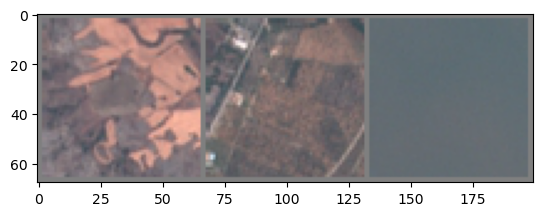

Predicted: HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation


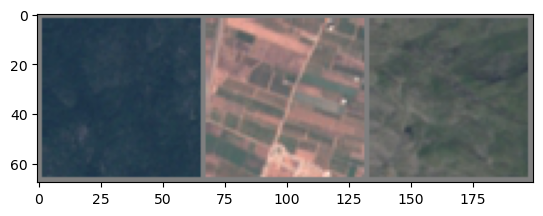

Predicted: HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation


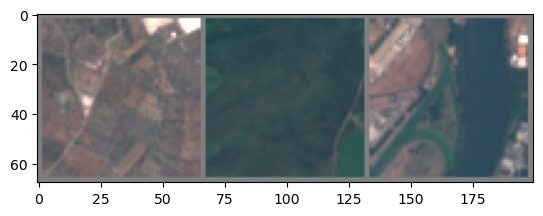

Predicted: HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation


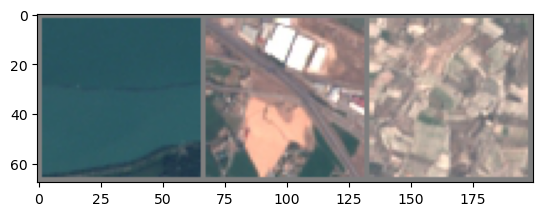

Predicted: HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation
Epoch 1, Loss: 2.3079220397384077


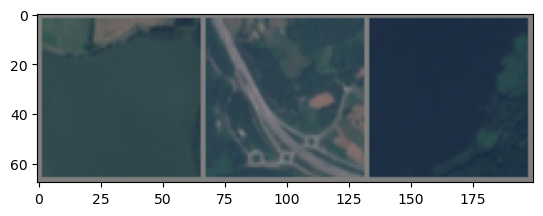

Predicted: HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation


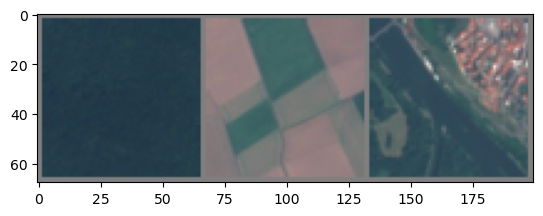

Predicted: HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation


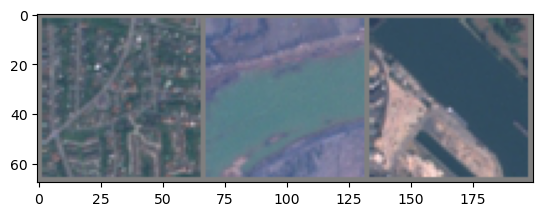

Predicted: HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation


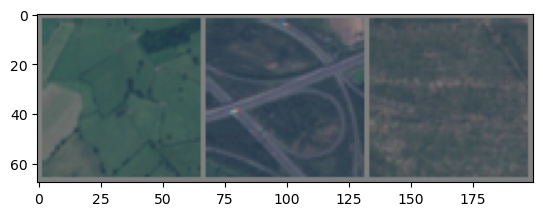

Predicted: HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation
Epoch 2, Loss: 2.307922050688002
Finished Training


In [72]:

# Function to display a sample of images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



# Number of training epochs
num_epochs = 2

testiter = iter(test_loader)
# Main training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 200 == 0:
            with torch.no_grad():
                # Show a sample of images from the test data and model's predictions
                test_images, test_labels = next(testiter)
                test_images, test_labels = test_images.to(device), test_labels.to(device)

                imshow(torchvision.utils.make_grid(test_images[:3].cpu()))
                test_outputs = net(test_images[:3])
                _, predicted = torch.max(test_outputs, 1)
                print('Predicted:', ' '.join(folder_list[predicted[j]] for j in range(3)))

    # Print average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1)}")


print('Finished Training')


## Retraining the model - this one is for performance, previous one was for illustration

In [74]:

# Create the model instance
net = CNNModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)  # Adjust learning rate as needed

# Set device (GPU if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Training loop with verbose output
def train_model(num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        total_steps = len(train_loader)
        
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Print progress within epoch
            if (i+1) % 100 == 0 or (i+1) == total_steps:  # Print every 100 steps or last step
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {running_loss/(i+1)}')
            
        # Print epoch-level performance
        print(f'Epoch {epoch + 1} complete, Average Loss: {running_loss / len(train_loader)}')

# Evaluation function
def evaluate_model(model, data_loader):
    correct = 0
    total = 0
    confusion_matrix = torch.zeros(10, 10, dtype=torch.int64)  # Assuming 10 classes

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            for t, p in zip(labels.view(-1), predicted.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

    print('Accuracy on test set: %d %%' % (100 * correct / total))
    return confusion_matrix

# Train the model
num_epochs = 10  # Adjust number of epochs as needed
train_model(num_epochs)

# Evaluate the model on the test set
confusion_matrix = evaluate_model(net, test_loader)
print(confusion_matrix)

Epoch [1/10], Step [100/675], Loss: 1.8637501919269561
Epoch [1/10], Step [200/675], Loss: 1.670763650536537
Epoch [1/10], Step [300/675], Loss: 1.56842759847641
Epoch [1/10], Step [400/675], Loss: 1.4840843990445136
Epoch [1/10], Step [500/675], Loss: 1.456076908826828
Epoch [1/10], Step [600/675], Loss: 1.4137250275413196
Epoch [1/10], Step [675/675], Loss: 1.3827463032581189
Epoch 1 complete, Average Loss: 1.3827463032581189
Epoch [2/10], Step [100/675], Loss: 1.0497411400079728
Epoch [2/10], Step [200/675], Loss: 1.016868426501751
Epoch [2/10], Step [300/675], Loss: 0.9960325308640798
Epoch [2/10], Step [400/675], Loss: 0.9851630061864853
Epoch [2/10], Step [500/675], Loss: 0.9604302409887314
Epoch [2/10], Step [600/675], Loss: 0.9499584815899531
Epoch [2/10], Step [675/675], Loss: 0.9388055407117915
Epoch 2 complete, Average Loss: 0.9388055407117915
Epoch [3/10], Step [100/675], Loss: 0.7482442393898964
Epoch [3/10], Step [200/675], Loss: 0.738158939704299
Epoch [3/10], Step [300/

In [85]:
# Evaluate the model on the test set
confusion_matrix = evaluate_model(net, train_loader)
print(confusion_matrix)

Accuracy on test set: 94 %
tensor([[2038,    1,   80,   36,    0,   18,  138,    0,   43,   44],
        [   4, 2336,   10,    0,    0,    9,    0,    0,   10,   43],
        [  30,   10, 2258,    8,    0,   11,   80,   10,    9,    1],
        [  10,    0,   18, 1925,    1,    0,   73,    3,   19,    0],
        [   0,    0,    2,   12, 1976,    0,    5,    8,    5,    0],
        [  37,   19,   18,    4,    0, 1412,   23,    0,   58,   17],
        [  32,    0,   90,    8,    0,    3, 1852,    0,    5,    0],
        [   0,    0,    2,    1,    1,    0,    1, 2370,    2,    0],
        [  19,    1,    8,   17,    0,   14,   21,    0, 1901,    3],
        [   7,    1,    2,    0,    0,    0,    0,    0,    1, 2366]])


In [76]:
confusion_df = pd.DataFrame(confusion_matrix.numpy(), index=folder_list, columns=folder_list)
confusion_df_normalized = (confusion_df.div(confusion_df.sum(axis=1), axis=0)*100).round(2)

confusion_df_normalized.columns = ['Pred_' + str(col) for col in confusion_df_normalized.columns]
confusion_df_normalized.index = ['Act_' + str(row) for row in confusion_df_normalized.index]
confusion_df_normalized

,Pred_Forest,Pred_River,Pred_Highway,Pred_AnnualCrop,Pred_SeaLake,Pred_HerbaceousVegetation,Pred_Industrial,Pred_Residential,Pred_PermanentCrop,Pred_Pasture
Act_Forest,67.61,0.50,4.98,2.33,0.17,4.15,12.62,0.00,5.32,2.33
Act_River,0.17,85.20,1.87,0.17,0.00,2.38,0.00,0.00,3.23,6.97
Act_Highway,3.09,1.54,64.49,5.49,0.34,1.89,17.15,2.23,3.43,0.34
Act_AnnualCrop,1.55,0.00,3.33,58.54,5.76,0.22,12.64,2.44,15.52,0.00
Act_SeaLake,0.00,0.00,0.81,2.85,87.80,0.00,1.83,5.08,1.63,0.00
Act_HerbaceousVegetation,10.44,8.25,11.89,2.67,0.00,35.68,6.80,0.00,22.09,2.18
Act_Industrial,4.71,0.20,18.82,4.71,0.39,1.37,66.08,0.39,3.33,0.00
Act_Residential,0.00,0.32,0.96,0.32,1.12,0.00,0.48,95.99,0.80,0.00
Act_PermanentCrop,4.07,2.91,4.07,17.64,2.52,8.14,7.56,1.74,50.58,0.78
Act_Pasture,1.61,2.09,0.00,0.16,0.00,1.61,0.00,0.00,2.09,92.46


#### Model does the most well in classifying Rivers, Pasture, Residential areas
#### Overall test accuracy is 72%, train accuracy is 94%, Looks like our model is overfitting

### Sample predictions of the final model on a sample of test data

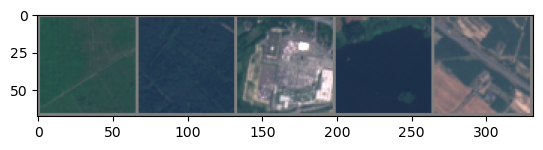

Predicted: River HerbaceousVegetation AnnualCrop Pasture AnnualCrop


In [83]:
with torch.no_grad():
    # Show a sample of images from the test data and model's predictions
    test_images, test_labels = next(testiter)
    test_images, test_labels = test_images.to(device), test_labels.to(device)

    imshow(torchvision.utils.make_grid(test_images[:5].cpu()))
    test_outputs = net(test_images[:5])
    _, predicted = torch.max(test_outputs, 1)
    print('Predicted:', ' '.join(folder_list[predicted[j]] for j in range(5)))

### Sample predictions of the final model on a sample of train data

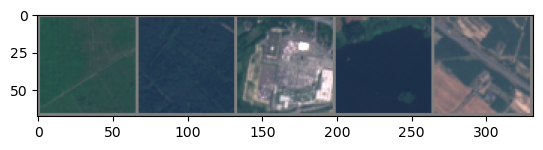

Predicted: River HerbaceousVegetation AnnualCrop Pasture AnnualCrop


In [89]:
trainiter = iter(train_loader)
with torch.no_grad():
    # Show a sample of images from the test data and model's predictions
    train_images, train_labels = next(trainiter)
    train_images, train_labels = test_images.to(device), train_labels.to(device)

    imshow(torchvision.utils.make_grid(train_images[:5].cpu()))
    train_outputs = net(train_images[:5])
    _, predicted = torch.max(train_outputs, 1)
    print('Predicted:', ' '.join(folder_list[predicted[j]] for j in range(5)))